In [1]:
import pandas as pd

ood_result_path = 'data/bbh-iid/results/gemma-2b/LowResource-0.10-L1-adam-probe-100-2024-03-04:13-14-22-mlp-hidden_states-direct-refalse-layer-14,15,16,17-ep100-bsz256-lr1e-5-wr0.1/best_model_bbh_scatter.csv'

In [2]:
ood_result = pd.read_csv(ood_result_path)

In [3]:
ood_result

,task,confidence,consistency,evaluation
0,multistep_arithmetic_two,0.029251,0.033333,0.033333
1,multistep_arithmetic_two,0.019254,0.100000,0.000000
2,multistep_arithmetic_two,0.000000,0.066667,0.033333
3,multistep_arithmetic_two,0.000000,0.033333,0.066667
4,multistep_arithmetic_two,0.041480,0.066667,0.000000
...,...,...,...,...
1819,web_of_lies,0.325761,0.600000,0.633333
1820,web_of_lies,0.229870,0.333333,0.400000
1821,web_of_lies,0.377082,0.633333,0.633333
1822,web_of_lies,0.374455,0.600000,0.166667


In [4]:
# calc the mean difference between the confidence and consistency w.r.t to different tasks
ood_result['confidence_consistency_diff'] = (ood_result['confidence'] - ood_result['consistency'])
# group by ood_result['task']
task_mean_diff:dict = {
    task:ood_result[ood_result['task'] == task]['confidence_consistency_diff'].mean() for task in ood_result['task'].unique()
}

In [6]:
ood_result[ood_result['task'] != 'temporal_sequences']

,task,confidence,consistency,evaluation,confidence_consistency_diff
0,multistep_arithmetic_two,0.029251,0.033333,0.033333,-0.004082
1,multistep_arithmetic_two,0.019254,0.100000,0.000000,-0.080746
2,multistep_arithmetic_two,0.000000,0.066667,0.033333,-0.066667
3,multistep_arithmetic_two,0.000000,0.033333,0.066667,-0.033333
4,multistep_arithmetic_two,0.041480,0.066667,0.000000,-0.025187
...,...,...,...,...,...
1819,web_of_lies,0.325761,0.600000,0.633333,-0.274239
1820,web_of_lies,0.229870,0.333333,0.400000,-0.103463
1821,web_of_lies,0.377082,0.633333,0.633333,-0.256251
1822,web_of_lies,0.374455,0.600000,0.166667,-0.225545


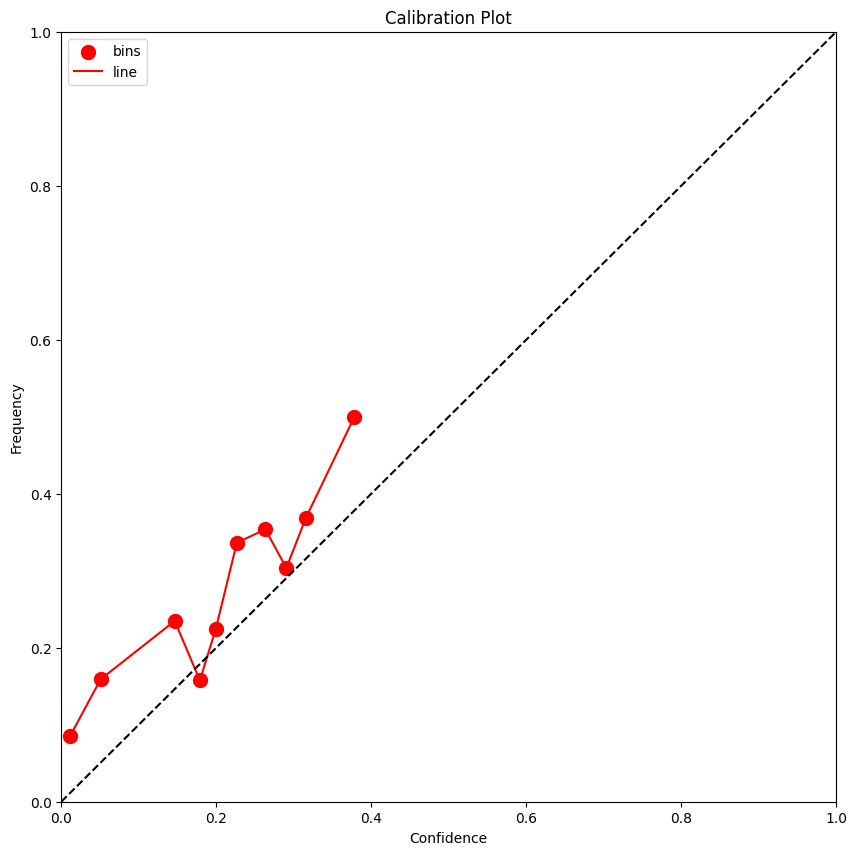

In [7]:
import matplotlib.pyplot as plt
x_list = ood_result[ood_result['task'] != 'temporal_sequences']['confidence']
y_list = ood_result[ood_result['task'] != 'temporal_sequences']['consistency']
num_bins = 10
xy_tuples = sorted(zip(x_list, y_list), key=lambda x: x[0])


# Group into bins
total_num = len(xy_tuples)
xy_grouped = [xy_tuples[int(i * total_num / num_bins): int((i + 1) * total_num / num_bins)] 
              for i in range(num_bins)]
# Calculate mean for each bin
x_means = [sum([x[0] for x in group]) / len(group) for group in xy_grouped]
y_means = [sum([x[1] for x in group]) / len(group) for group in xy_grouped]
# Plotting
plt.figure(figsize=(10, 10))
plt.scatter(x_means, y_means, s=100, c='red', marker='o', label='bins')
plt.plot(x_means, y_means, c='red', label='line')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.title('Calibration Plot')
plt.legend()

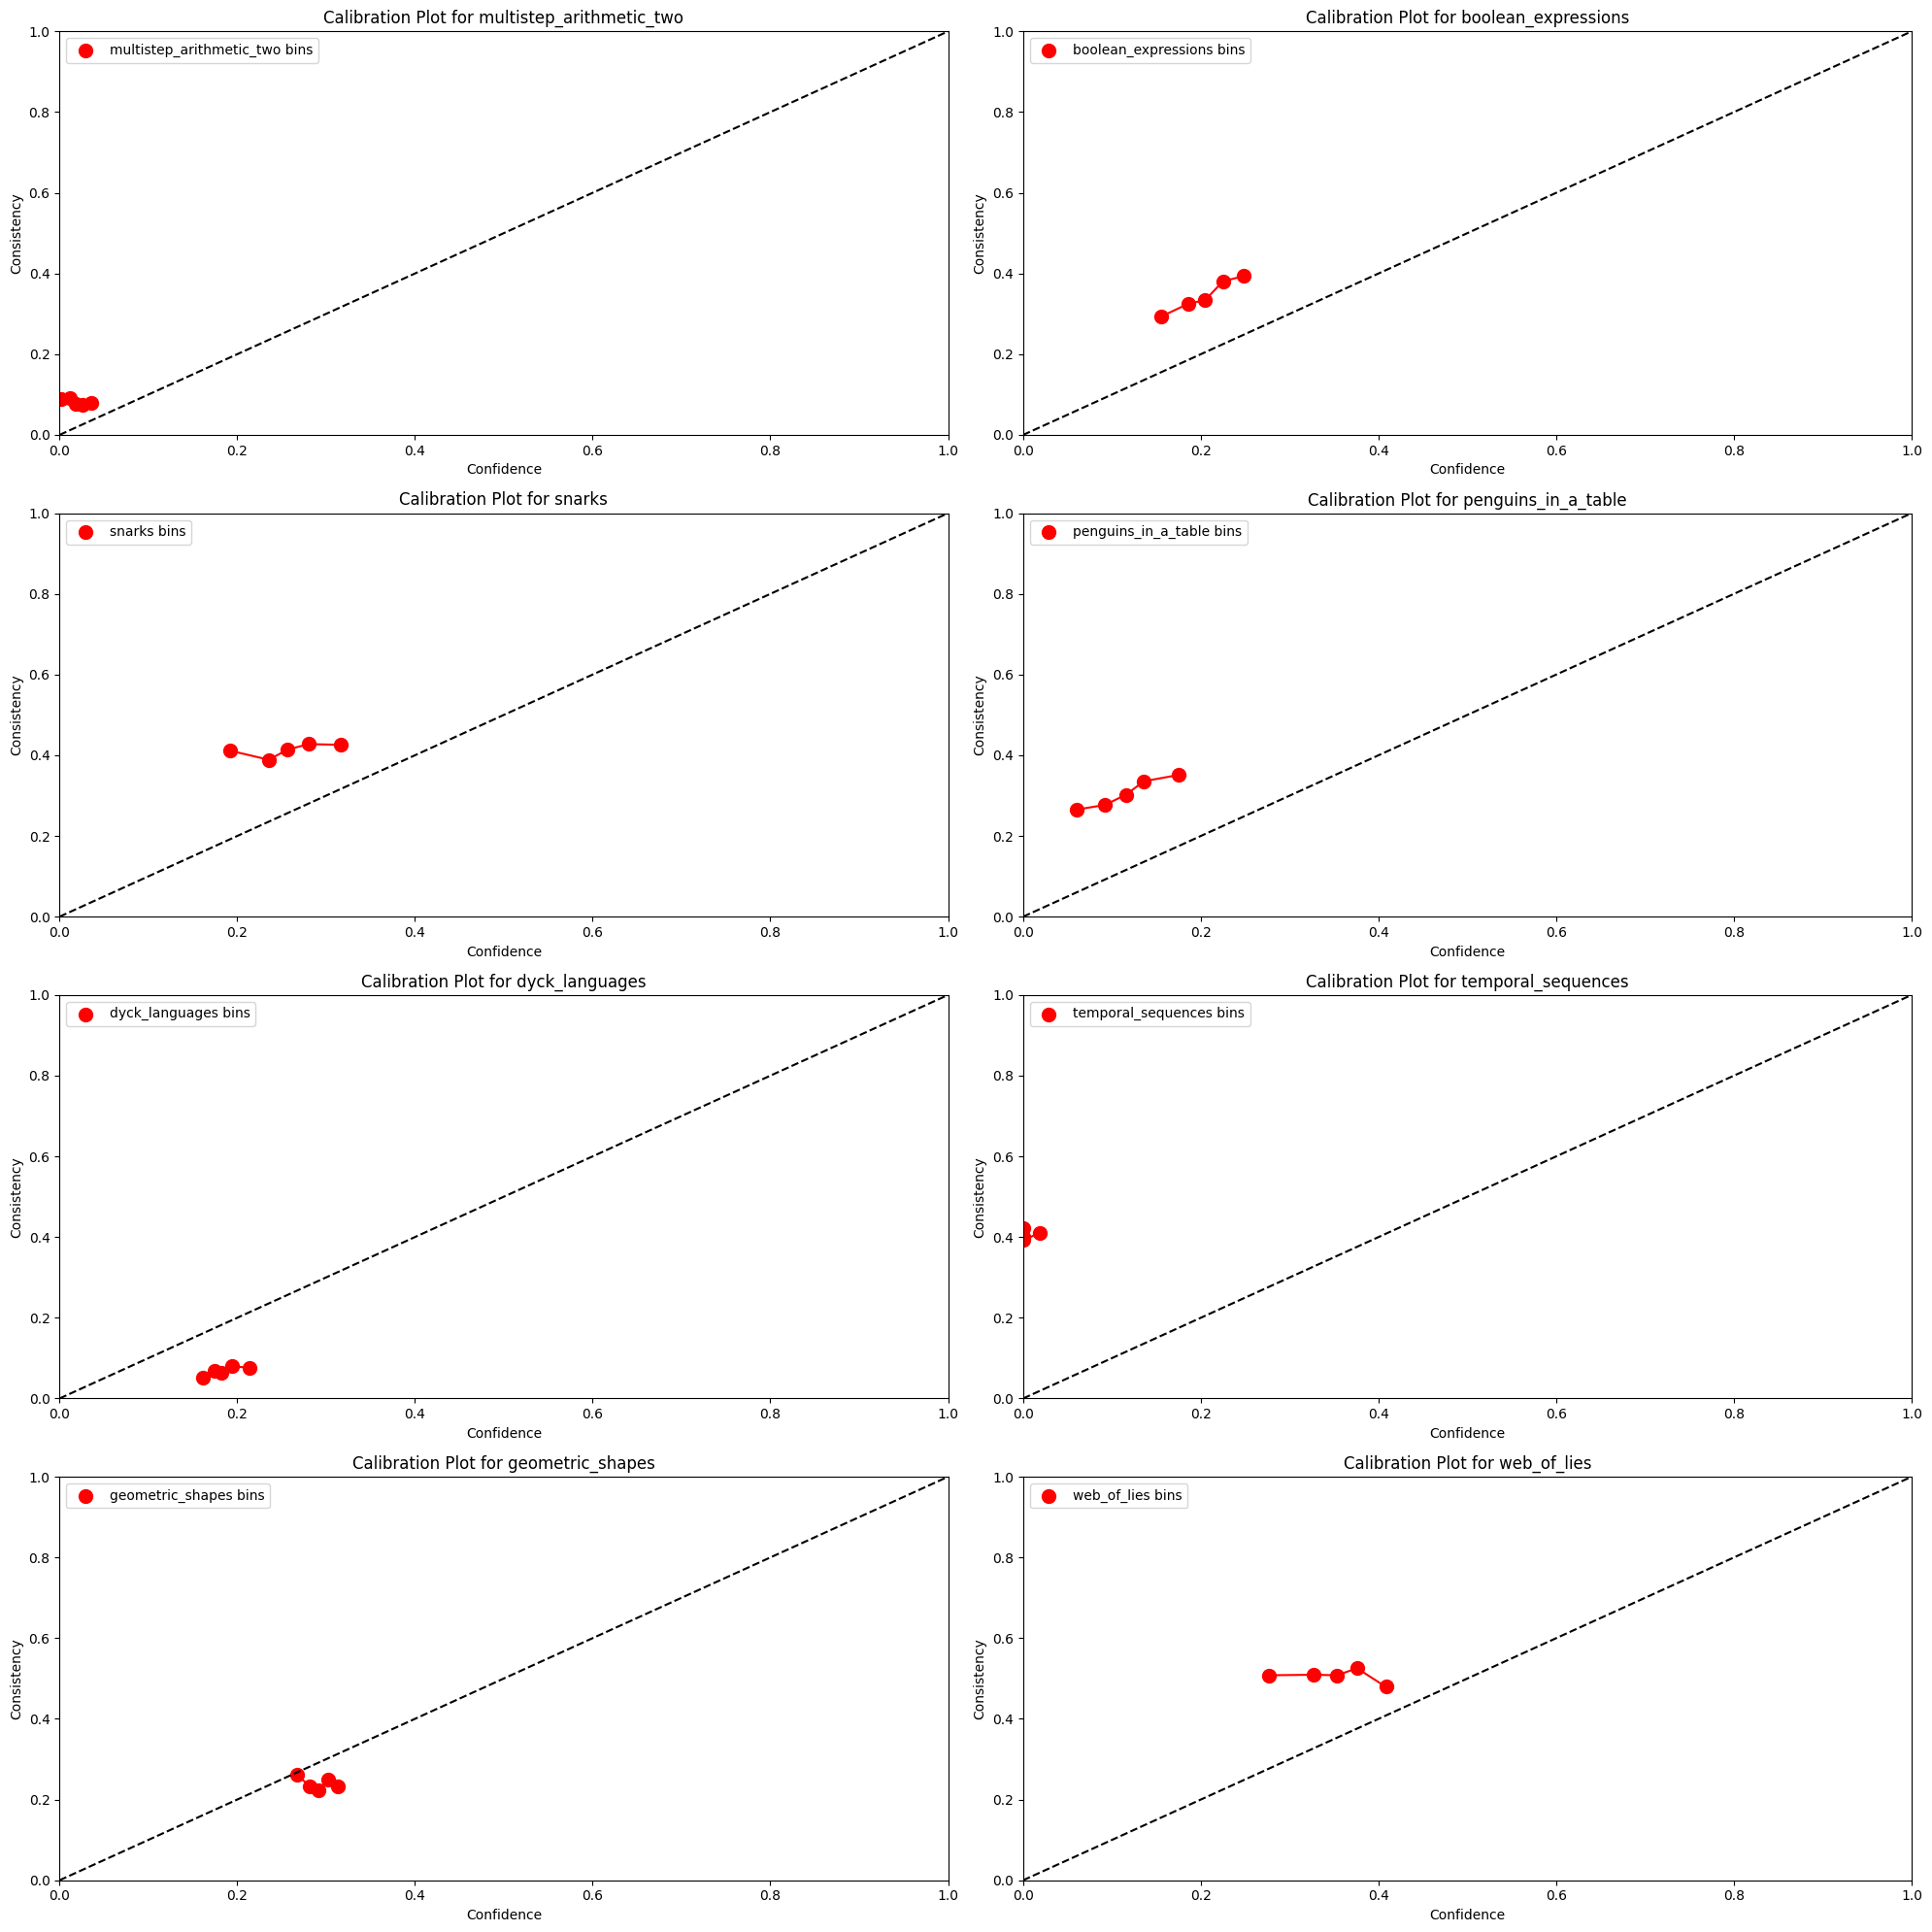

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'ood_result' is a pandas DataFrame with columns ['task', 'confidence', 'consistency']

# Get the list of unique tasks
unique_tasks = ood_result['task'].unique()
num_tasks = len(unique_tasks)
num_bins = 5

# Setup plot dimensions
n_cols = 2  # Number of columns in the subplot grid
n_rows = (num_tasks + n_cols - 1) // n_cols  # Calculate rows needed, ensuring all tasks fit

plt.figure(figsize=(20, 5 * n_rows))  # Adjust the figure size as needed

for index, task in enumerate(unique_tasks, 1):
    # Filter results for the current task
    task_data = ood_result[ood_result['task'] == task]
    x_list = task_data['confidence']
    y_list = task_data['consistency']
    xy_tuples = sorted(zip(x_list, y_list), key=lambda x: x[0])

    # Group into bins
    total_num = len(xy_tuples)
    xy_grouped = [xy_tuples[int(i * total_num / num_bins): int((i + 1) * total_num / num_bins)]
                  for i in range(num_bins)]

    # Calculate mean for each bin
    x_means = [sum([x[0] for x in group]) / len(group) for group in xy_grouped]
    y_means = [sum([x[1] for x in group]) / len(group) for group in xy_grouped]

    # Subplot for each task
    plt.subplot(n_rows, n_cols, index)
    plt.scatter(x_means, y_means, s=100, c='red', marker='o', label=f'{task} bins')
    plt.plot(x_means, y_means, c='red')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('Confidence')
    plt.ylabel('Consistency')  # Changed from 'Frequency' to 'Consistency' to match the y_list definition
    plt.title(f'Calibration Plot for {task}')
    plt.legend()

plt.tight_layout()
plt.show()
